In [2]:
# ============================================================
# 0. SETUP
# ============================================================

# If you're in Jupyter, run each cell separately.
# This file assumes car_sales_data.csv is in the same directory.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')


# ============================================================
# 1. LOAD DATA
# ============================================================

# Update the path if needed
data_path = "car_sales_data.csv"

df = pd.read_csv(data_path)

print("Shape of dataset (rows, columns):", df.shape)
df.head()


Shape of dataset (rows, columns): (50000, 7)


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.00,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.00,Petrol,2016,57850,49704
2,Ford,Mondeo,1.60,Diesel,2014,39190,24072
3,Toyota,RAV4,1.80,Hybrid,1988,210814,1705
4,VW,Polo,1.00,Petrol,2006,127869,4101


In [3]:
# Basic info about dtypes and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [4]:
# Quick numeric summary
df.describe()


,Engine size,Year of manufacture,Mileage,Price
count,"50,000.00","50,000.00","50,000.00","50,000.00"
mean,1.77,"2,004.21","112,497.32","13,828.90"
std,0.73,9.65,"71,632.52","16,416.68"
min,1.00,"1,984.00",630.00,76.00
25%,1.40,"1,996.00","54,352.25","3,060.75"
50%,1.60,"2,004.00","100,987.50","7,971.50"
75%,2.00,"2,012.00","158,601.00","19,026.50"
max,5.00,"2,022.00","453,537.00","168,081.00"


In [5]:
# ============================================================
# 2. BASIC DATA CHECKS
# ============================================================

# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Unique counts for categorical columns
categorical_cols = ["Manufacturer", "Model", "Fuel type"]
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].nunique()}")


Missing values per column:
Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

Number of duplicate rows: 12

Unique values in Manufacturer: 5

Unique values in Model: 15

Unique values in Fuel type: 3


In [6]:
# ============================================================
# 3. FEATURE ENGINEERING: VEHICLE AGE
# ============================================================

CURRENT_YEAR = 2025  # adjust if you need a different reference year

df["Age"] = CURRENT_YEAR - df["Year of manufacture"]

# Quick sanity check for Age
print(df[["Year of manufacture", "Age"]].head())
df["Age"].describe()


   Year of manufacture  Age
0                 2002   23
1                 2016    9
2                 2014   11
3                 1988   37
4                 2006   19


,Age
count,"50,000.00"
mean,20.79
std,9.65
min,3.00
25%,13.00
50%,21.00
75%,29.00
max,41.00


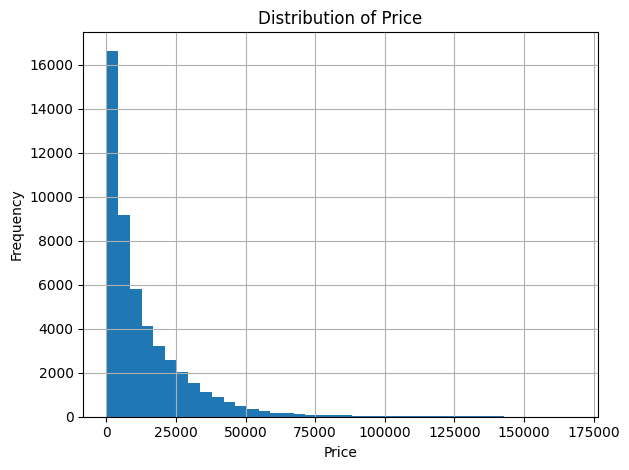

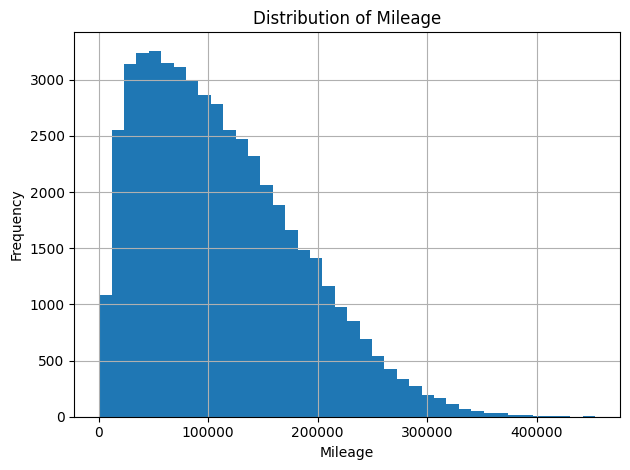

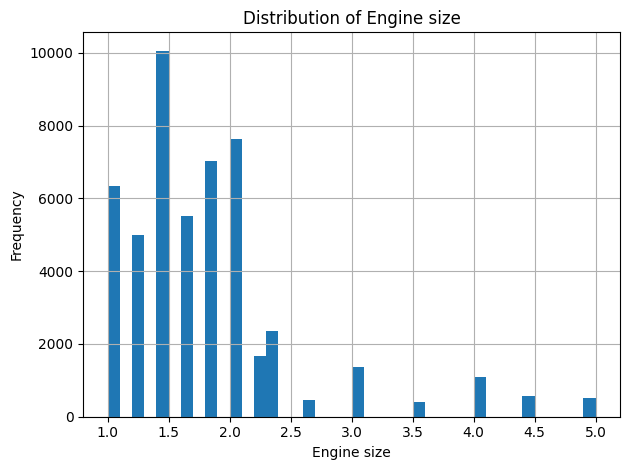

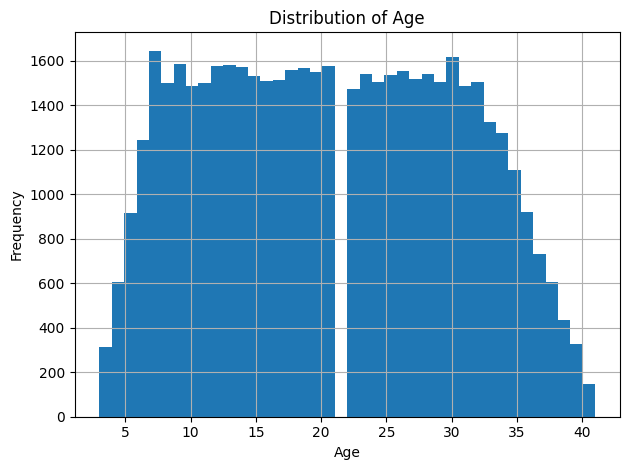

In [7]:
# ============================================================
# 4. BASIC DISTRIBUTIONS (HISTOGRAMS)
# ============================================================

numeric_cols = ["Price", "Mileage", "Engine size", "Age"]

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


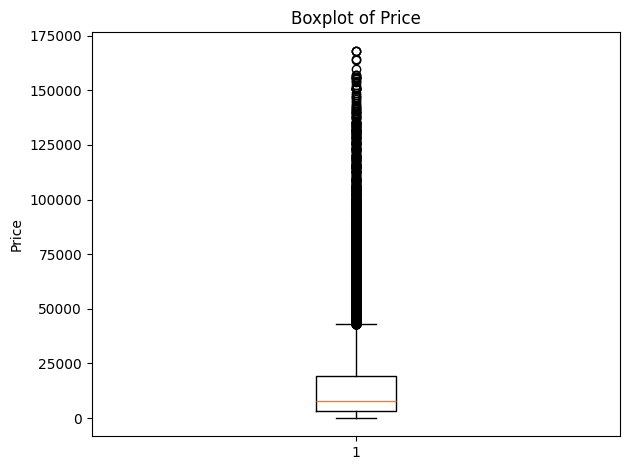

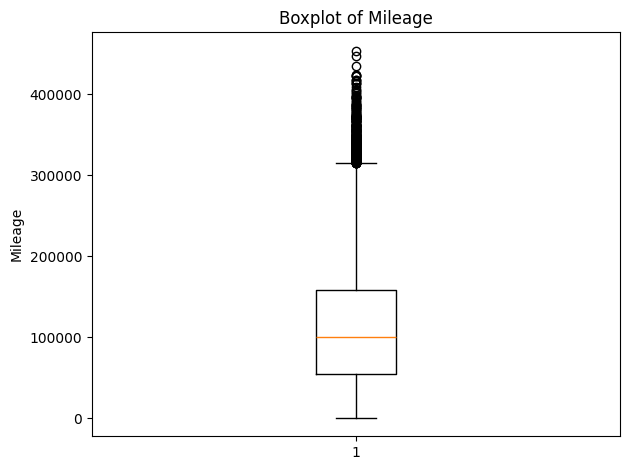

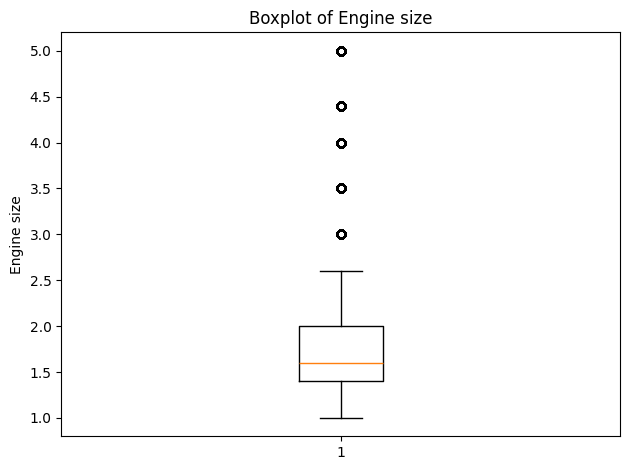

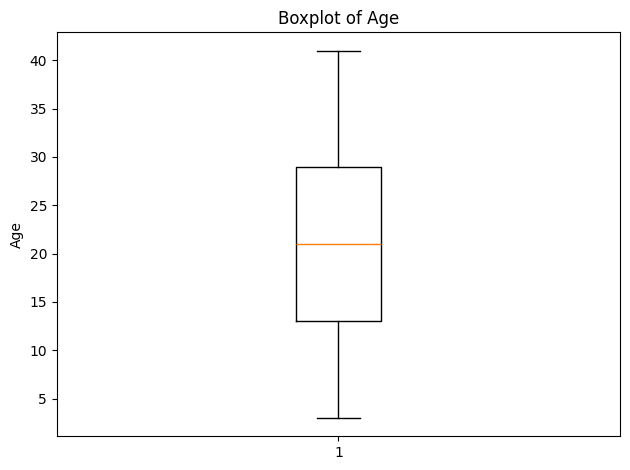

In [8]:
# ============================================================
# 5. OUTLIER CHECKS (BOXPLOTS)
# ============================================================

for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col], vert=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


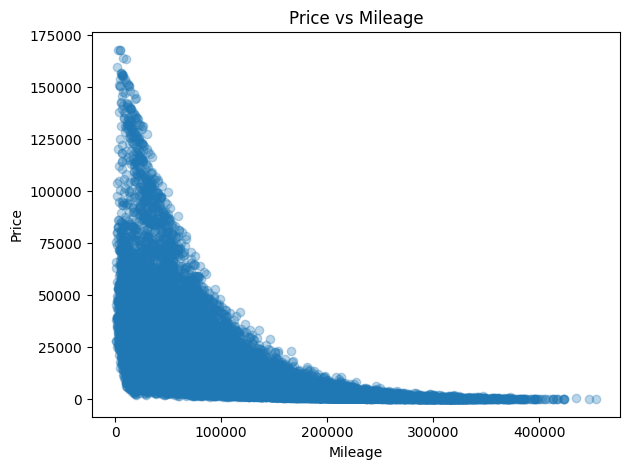

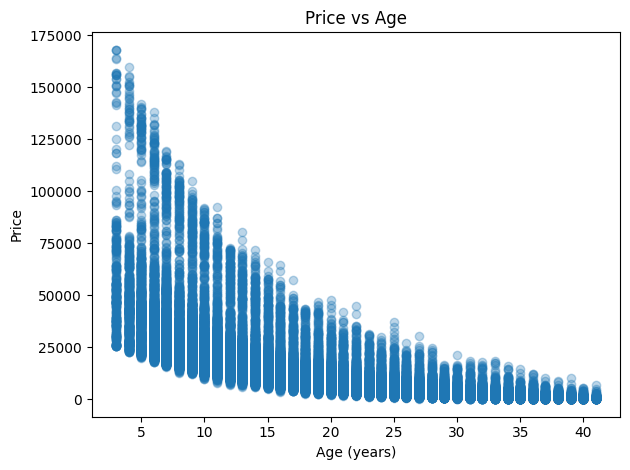

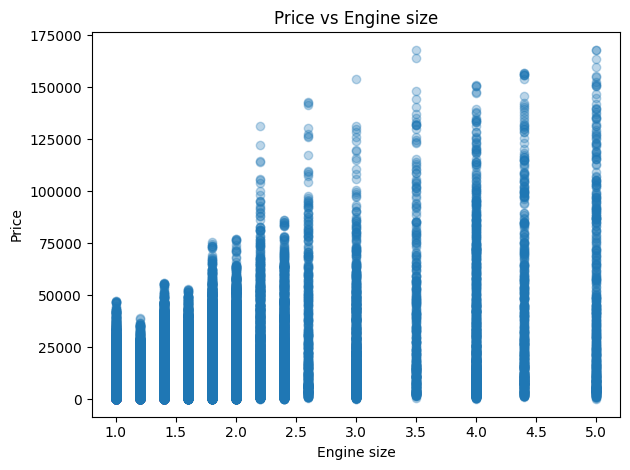

In [9]:
# ============================================================
# 6. RELATIONSHIPS WITH PRICE
# ============================================================

# Price vs Mileage
plt.figure()
plt.scatter(df["Mileage"], df["Price"], alpha=0.3)
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Price vs Age
plt.figure()
plt.scatter(df["Age"], df["Price"], alpha=0.3)
plt.title("Price vs Age")
plt.xlabel("Age (years)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Price vs Engine size
plt.figure()
plt.scatter(df["Engine size"], df["Price"], alpha=0.3)
plt.title("Price vs Engine size")
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


Correlation matrix:
                     Price  Mileage  Engine size   Age  Year of manufacture
Price                 1.00    -0.63         0.40 -0.71                 0.71
Mileage              -0.63     1.00         0.00  0.81                -0.81
Engine size           0.40     0.00         1.00  0.00                -0.00
Age                  -0.71     0.81         0.00  1.00                -1.00
Year of manufacture   0.71    -0.81        -0.00 -1.00                 1.00


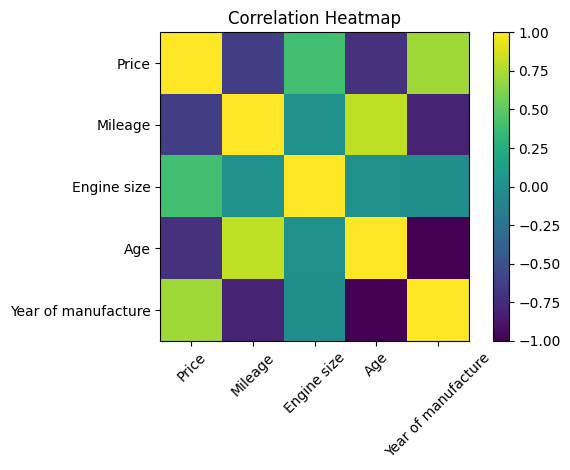

In [10]:
# ============================================================
# 7. CORRELATION MATRIX (NUMERIC FEATURES)
# ============================================================

corr_cols = ["Price", "Mileage", "Engine size", "Age", "Year of manufacture"]
corr_matrix = df[corr_cols].corr()

print("Correlation matrix:")
print(corr_matrix)

plt.figure()
plt.imshow(corr_matrix, interpolation="nearest")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Top manufacturers by count:
Manufacturer
Ford       14959
VW         14913
Toyota     12554
BMW         4965
Porsche     2609
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

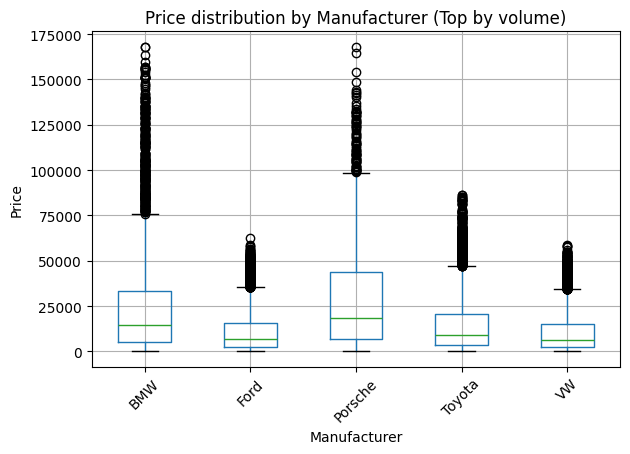

In [11]:
# ============================================================
# 8. PRICE BY MANUFACTURER (TOP BRANDS)
# ============================================================

# Count of cars per manufacturer
manufacturer_counts = df["Manufacturer"].value_counts()
print("Top manufacturers by count:")
print(manufacturer_counts.head(20))

# Focus on manufacturers with enough data points (e.g., >= 100)
min_count = 100
top_manufacturers = manufacturer_counts[manufacturer_counts >= min_count].index

df_top_man = df[df["Manufacturer"].isin(top_manufacturers)]

plt.figure(figsize=(10, 6))
df_top_man.boxplot(column="Price", by="Manufacturer", rot=45)
plt.title("Price distribution by Manufacturer (Top by volume)")
plt.suptitle("")  # remove automatic title
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

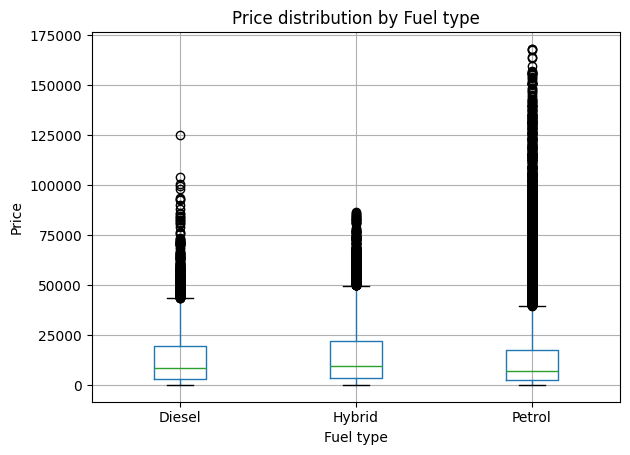

Average price by Fuel type:
Fuel type
Diesel   13,145.08
Petrol   13,690.62
Hybrid   14,949.29
Name: Price, dtype: float64


In [12]:
# ============================================================
# 9. PRICE BY FUEL TYPE
# ============================================================

plt.figure()
df.boxplot(column="Price", by="Fuel type")
plt.title("Price distribution by Fuel type")
plt.suptitle("")
plt.xlabel("Fuel type")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

print("Average price by Fuel type:")
print(df.groupby("Fuel type")["Price"].mean().sort_values())


Average mileage by manufacturer (top):
Manufacturer
Toyota    111,361.13
Porsche   111,638.25
Ford      112,525.88
BMW       112,837.73
VW        113,462.09
Name: Mileage, dtype: float64


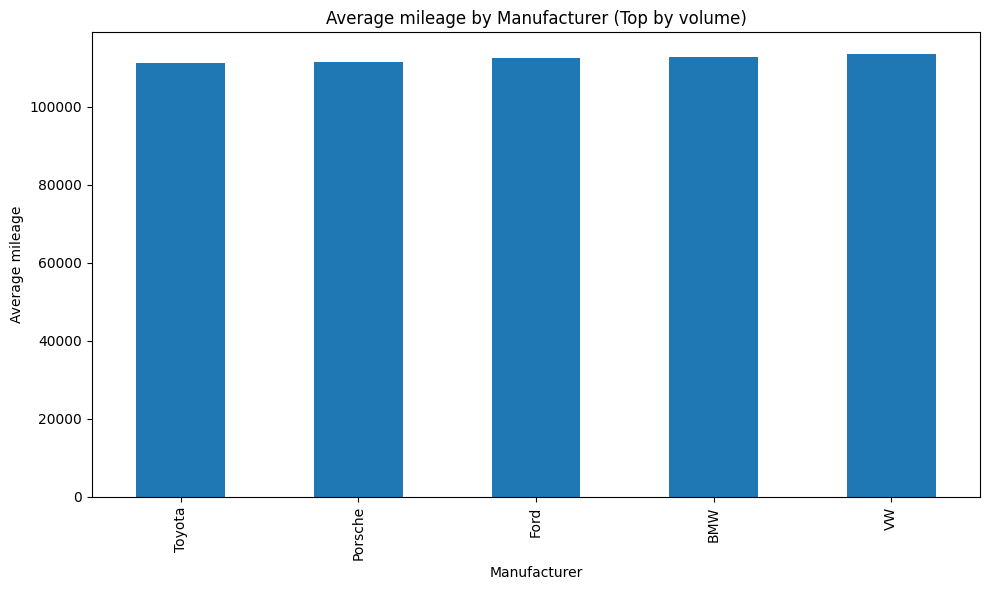


Average age by manufacturer (top):
Manufacturer
Porsche   20.44
Toyota    20.68
Ford      20.80
VW        20.88
BMW       20.95
Name: Age, dtype: float64


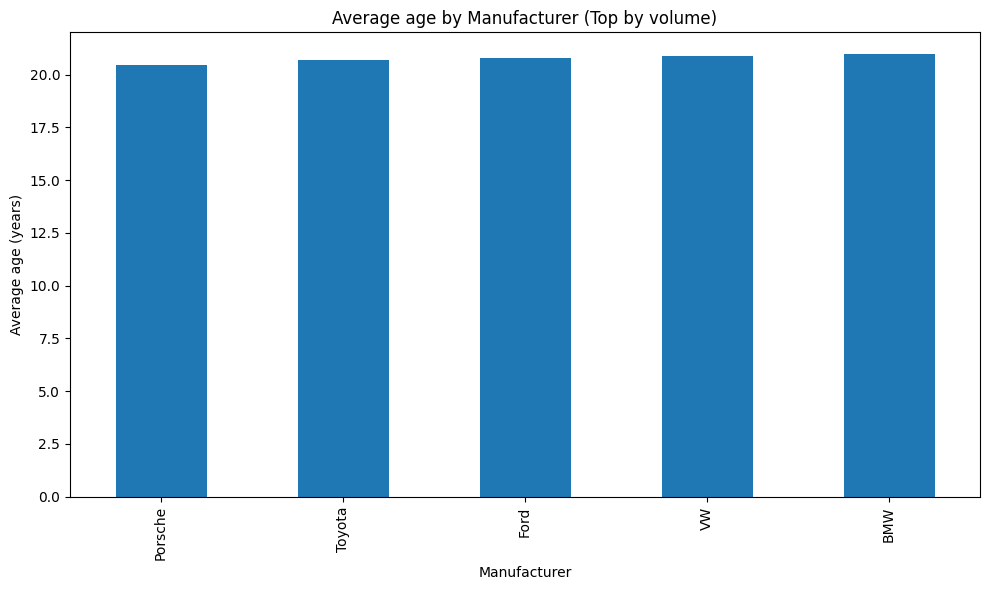

In [13]:
# ============================================================
# 10. MILEAGE & AGE BY MANUFACTURER (OPTIONAL DEEPER EDA)
# ============================================================

# Average mileage by manufacturer (top manufacturers only)
avg_mileage = df_top_man.groupby("Manufacturer")["Mileage"].mean().sort_values()
print("Average mileage by manufacturer (top):")
print(avg_mileage)

plt.figure(figsize=(10, 6))
avg_mileage.plot(kind="bar")
plt.title("Average mileage by Manufacturer (Top by volume)")
plt.xlabel("Manufacturer")
plt.ylabel("Average mileage")
plt.tight_layout()
plt.show()

# Average age by manufacturer (top manufacturers only)
avg_age = df_top_man.groupby("Manufacturer")["Age"].mean().sort_values()
print("\nAverage age by manufacturer (top):")
print(avg_age)

plt.figure(figsize=(10, 6))
avg_age.plot(kind="bar")
plt.title("Average age by Manufacturer (Top by volume)")
plt.xlabel("Manufacturer")
plt.ylabel("Average age (years)")
plt.tight_layout()
plt.show()


In [14]:
# ============================================================
# 11. SIMPLE OUTLIER REMOVAL SUGGESTION (IQR METHOD)
# ============================================================
# This cell does NOT modify df in-place by default.
# You can inspect how many rows would be removed and then decide.

def remove_outliers_iqr(data, column, factor=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    mask = (data[column] >= lower_bound) & (data[column] <= upper_bound)
    return data[mask], lower_bound, upper_bound

for col in ["Price", "Mileage"]:
    filtered_df, lb, ub = remove_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lb:.2f}, Upper bound: {ub:.2f}")
    print(f"Rows before: {len(df)}, Rows after potential filtering: {len(filtered_df)}")

# If you decide to actually apply it:
# df_clean, _, _ = remove_outliers_iqr(df, "Price")
# df_clean, _, _ = remove_outliers_iqr(df_clean, "Mileage")
# and then use df_clean for modelling.



Column: Price
Lower bound: -20887.88, Upper bound: 42975.12
Rows before: 50000, Rows after potential filtering: 47351

Column: Mileage
Lower bound: -102020.88, Upper bound: 314974.12
Rows before: 50000, Rows after potential filtering: 49615


In [15]:
# ============================================================
# 12. QUICK TEXT SUMMARY
# ============================================================

print("=== QUICK SUMMARY FOR REPORT (FILL IN WITH YOUR INTERPRETATION) ===")

print("\n1) Data shape:", df.shape)
print("   - Number of rows:", df.shape[0])
print("   - Number of columns:", df.shape[1])

print("\n2) No. of manufacturers:", df['Manufacturer'].nunique())
print("   No. of models:", df['Model'].nunique())
print("   No. of fuel types:", df['Fuel type'].nunique())

print("\n3) Price summary:")
print(df['Price'].describe())

print("\n4) Mileage summary:")
print(df['Mileage'].describe())

print("\n5) Age summary:")
print(df['Age'].describe())

print("\n6) Correlations with Price:")
print(corr_matrix["Price"].sort_values(ascending=False))

print("\nReview the plots and these summaries, then write EDA narrative in your own words.")


=== QUICK SUMMARY FOR REPORT (FILL IN WITH YOUR INTERPRETATION) ===

1) Data shape: (50000, 8)
   - Number of rows: 50000
   - Number of columns: 8

2) No. of manufacturers: 5
   No. of models: 15
   No. of fuel types: 3

3) Price summary:
count    50,000.00
mean     13,828.90
std      16,416.68
min          76.00
25%       3,060.75
50%       7,971.50
75%      19,026.50
max     168,081.00
Name: Price, dtype: float64

4) Mileage summary:
count    50,000.00
mean    112,497.32
std      71,632.52
min         630.00
25%      54,352.25
50%     100,987.50
75%     158,601.00
max     453,537.00
Name: Mileage, dtype: float64

5) Age summary:
count   50,000.00
mean        20.79
std          9.65
min          3.00
25%         13.00
50%         21.00
75%         29.00
max         41.00
Name: Age, dtype: float64

6) Correlations with Price:
Price                  1.00
Year of manufacture    0.71
Engine size            0.40
Mileage               -0.63
Age                   -0.71
Name: Price, dtype: f